In [1]:
cd /home/haibin/magnus/output/Vis23Fric8/

/home/haibin/magnus/output/Vis23Fric8


In [2]:
import underworld as uw
import math
from underworld import function as fn
import glucifer
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors,ticker,cm
from unsupported.LMR import *
import unsupported.scaling as sca
from unsupported.scaling import nonDimensionalize as nd
from scipy.interpolate import interp2d
from matplotlib import *
from mpldatacursor import datacursor
%matplotlib notebook
#def stRate2D(step, Z_coord,X_coord,quality):
u = sca.UnitRegistry
tempMin = 273.*u.degK 
tempMax = (1400.+ 273.)*u.degK
bodyforce = 3300 * u.kilogram / u.metre**3 * 9.81 * u.meter / u.second**2
velocity = 1e-9*u.meter/u.second

KL = 100e3*u.meter
Kt = KL/velocity
KT = tempMax 
KM = bodyforce * KL**2 * Kt**2
K  = 1.*u.mole

sca.scaling["[length]"] = KL
sca.scaling["[time]"] = Kt
sca.scaling["[mass]"]= KM
sca.scaling["[temperature]"] = KT
sca.scaling["[substance]"] = K

lengthScale = 100

inputPath = os.path.join(os.path.abspath("."))
outputPath = os.path.join(os.path.abspath("."),"plot/")
if uw.rank()==0:
    if not os.path.exists(outputPath):
        os.makedirs(outputPath)
uw.barrier()

step=0

fo = open("dicMesh"+str(step).zfill(4),'r')
meshDic=eval(fo.read())
xRes=meshDic['elements'][0]
yRes=meshDic['elements'][1]

mesh = uw.mesh.FeMesh_Cartesian( elementType = (("Q1/dQ0")), 
                                 elementRes  = ( xRes, yRes), 
                                 periodic    = [False, False]  ) 
mesh.load("mesh"+str(step).zfill(4))

minX = min(mesh.data[:,0])
maxX = max(mesh.data[:,0])
minY = min(mesh.data[:,1])
maxY = max(mesh.data[:,1])

mesh = uw.mesh.FeMesh_Cartesian( elementType = ("Q1/dQ0"),
                                 elementRes  = (xRes, yRes), 
                                 minCoord    = (minX, minY), 
                                 maxCoord    = (maxX, maxY),
                                 periodic    = [False, False]) 

/home/haibin/underworld/unsupported/scaling/__init__.py:13: UserWarning: 

    The scaling module is not supported.

    It requires 'pint' as a dependency.

    You can install pint by running:

    'pip install pint' in a terminal

    Questions should be addressed to romain.beucher@unimelb.edu.au 
 
  Questions should be addressed to romain.beucher@unimelb.edu.au \n """


In [ ]:
vis_factor = nd(1*u.pascal*u.second)
vel_factor = nd(1*u.centimeter/u.year)
strainRate_factor = nd(1/u.second)

ncount = 21
stress_xy = np.zeros(ncount)
T = np.zeros(ncount)
position = [0.9, 4.]
i = 0
while i< ncount:
    step=i*50
    fo = open("time"+str(step).zfill(4),"r")
    t = fo.read()
    time_factor = nd(1*u.megayear)
    time = float(t)/time_factor #sca.Dimensionalize(float(t), units=u.megayear)

    meshDevStress = uw.mesh.MeshVariable( mesh, 1 )
    meshDevStress.load("meshAllStress"+str(step).zfill(4))

    stress_xy[i] = meshDevStress.evaluate(position)
    T[i] = time
    i = i+1


In [ ]:
stress_factor = nd(1*u.pascal)
fig,ax=plt.subplots()
ax.plot(T/time_factor,stress_xy/stress_factor)
ax.ticklabel_format(style='sci', scilimits=(-2,2))
ax.set_xlabel("Time $(Myr)$")
ax.set_ylabel("Stress $(Pa)$")
plt.show()

In [3]:
step=2

fo = open("time"+str(step).zfill(4),"r")
t = fo.read()
time_factor = nd(1*u.megayear)
time = float(t)/time_factor #sca.Dimensionalize(float(t), units=u.megayear)

vis_factor = nd(1*u.pascal*u.second)
vel_factor = nd(1*u.centimeter/u.year)
strainRate_factor = nd(1/u.second)    

velocityFieldCopy  = uw.mesh.MeshVariable( mesh=mesh,  nodeDofCount=2 )
velocityFieldCopy.load("velocityField"+str(step).zfill(4)) 
#velocityFieldCopy  = sca.Dimensionalize(velocityFieldCopy, units=u.meter/u.second)
strainRateFn = fn.tensor.symmetric( velocityFieldCopy.fn_gradient )
strainRate_2ndInvariant = fn.tensor.second_invariant(strainRateFn)





countx=xRes+1
countz=yRes+1

xcoord = np.linspace(minX,maxX,countx)
zcoord = np.linspace(minY, maxY,countz)
locations = np.zeros( (countz*countx,2))
for j in range(countx):
    for k in range(countz):
        n = j+k*countx
        locations[n,0] = xcoord[j] 
        locations[n,1] = zcoord[k]

strainRate= strainRate_2ndInvariant.evaluate(locations)
X,Y=np.meshgrid(xcoord,zcoord)
Z=np.reshape(strainRate,(countz,countx))

In [4]:
deformationSwarm1 = uw.swarm.Swarm( mesh=mesh )
deformationSwarm1.load("deformationSwarm1"+str(step).zfill(4))

deformationSwarm2 = uw.swarm.Swarm( mesh=mesh )
deformationSwarm2.load("deformationSwarm2"+str(step).zfill(4))
coordx1=np.zeros(len(deformationSwarm1.particleCoordinates.data[:,0]))
coordy1=np.zeros(len(deformationSwarm1.particleCoordinates.data[:,1]))
for index,coord in enumerate(deformationSwarm1.particleCoordinates.data):
 
    
    coordx1[index] = deformationSwarm1.particleCoordinates.data[index][0]  
    coordy1[index] = deformationSwarm1.particleCoordinates.data[index][1] 
    
coordx2=np.zeros(len(deformationSwarm2.particleCoordinates.data[:,0]))
coordy2=np.zeros(len(deformationSwarm2.particleCoordinates.data[:,1]))
for index,coord in enumerate(deformationSwarm2.particleCoordinates.data):
 
    
    coordx2[index] = deformationSwarm2.particleCoordinates.data[index][0]  
    coordy2[index] = deformationSwarm2.particleCoordinates.data[index][1]

<IPython.core.display.Javascript object>


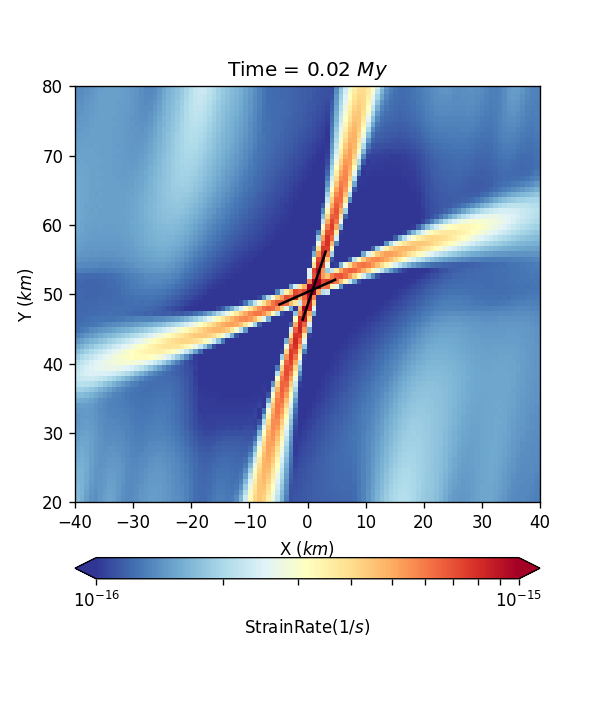

In [10]:

plt.figure(figsize=(5,6))
plt.draw()
#plt.scatter(meshSlice.data[:,0],meshSlice.data[:,1],s=100,c=np.log10(mesh_Temp.data[:,0]))
colorMap = matplotlib.cm.RdYlBu_r
im = plt.pcolor(X*lengthScale,Y*lengthScale,Z/strainRate_factor,\
         norm=colors.LogNorm(vmin=Z.min(),vmax=Z.max()),cmap=colorMap )
plt.clim(1e-16,1e-15)
cbar = plt.colorbar(extend='both',orientation='horizontal',pad=0.1)
cbar.ax.set_xlabel('StrainRate($1/s$)')

#plt.scatter(coordx1*lengthScale,coordy1*lengthScale,s=5,c='grey')
#plt.scatter(coordx2*lengthScale,coordy2*lengthScale,s=5,c='grey')

#Fric1-D2
'''
x1 = [-4.82, 4.76]
x2 = [0.85, 0.77]
y1 = [50.44, 50.56]
y2 = [56.15,46.57]

#Fric4-D2

x1 = [-4.82, 4.76]
x2 = [1.31, -0.02]
y1 = [49.51, 51.24]
y2 = [56.15,46.35]

#Fric6-D2

x1 = [-4.82, 4.76]
x2 = [2.37, -0.02]
y1 = [49.51, 51.91]
y2 = [56.15,46.35]
'''
x1 = [-4.82, 4.76]
x2 = [3.12, -0.83]
y1 = [48.53, 52.1]
y2 = [56.15,46.35]


plt.plot(x1,y1,'k',x2,y2,'k')

plt.xlabel("X ($km$)")
plt.ylabel("Y ($km$)")

plt.title("Time = {0:.2f} $My$".format(time))
#plt.axis("equal")
#datacursor()
plt.axis([-40,40,20,80])
plt.savefig('/home/haibin/Desktop/Friction/'+'strainRatePDFric8_D2'+str(step)+'.pdf',dpi=300)
#plt.gcf().show()
plt.show()

In [11]:
from numpy.linalg import norm
from numpy import dot
import math

p0 = [x1[0],y1[0]]
p1 = [x1[1],y1[1]]
p2 = [x2[0],y2[0]]
p3 = [x2[1],y2[1]]

v0 = np.array(p1) - np.array(p0)
v1 = np.array(p3) - np.array(p2)

angle = np.math.atan2(np.linalg.det([v0,v1]),np.dot(v0,v1))
print np.degrees(angle)+180

47.6095701272


<IPython.core.display.Javascript object>


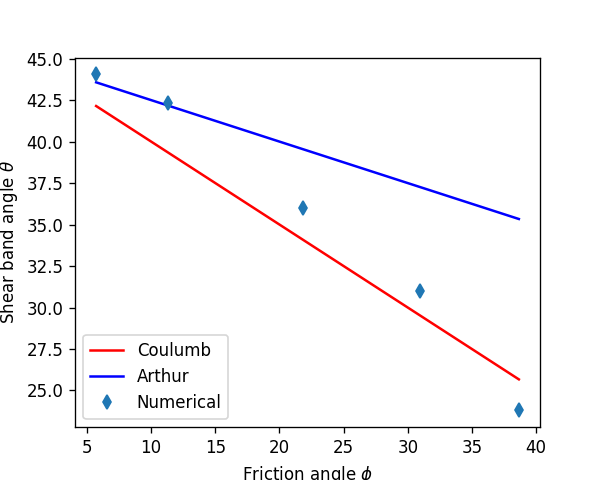

[ 44.05  42.35  36.    31.    23.8 ]


In [12]:
plt.figure(figsize=(5,4))
x = np.array([0.1,0.2,0.4,0.6,0.8])
#y = np.array([86.0, 84.0,71.0,54.0,44.0])
y = np.array([88.1, 84.7,72.0,62.0,47.6])
phi = np.degrees(np.arctan(x))
print  y/2.0
theta1= 45. - phi/2.
theta2= 45. - phi/4.
theta3= y/2.
plt.plot(phi,theta1,'r-',label="Coulumb")
plt.plot(phi,theta2,'b-',label="Arthur")
plt.plot(phi,theta3,'d',label="Numerical")
plt.xlabel("Friction angle "+ '$\phi$')
plt.ylabel("Shear band angle "+ '$\\theta$')
plt.legend(loc="lower left")
plt.savefig('/home/haibin/Desktop/'+'FrictionAngle.png',dpi=300)
plt.show()